In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('datasets/titanic dataset.csv')

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1)
y = df['Survived']

C:\Users\vishn\AppData\Local\Temp\ipykernel_27212\1699757813.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\vishn\AppData\Local\Temp\ipykernel_27212\1699757813.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [3]:
df.shape

(891, 8)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

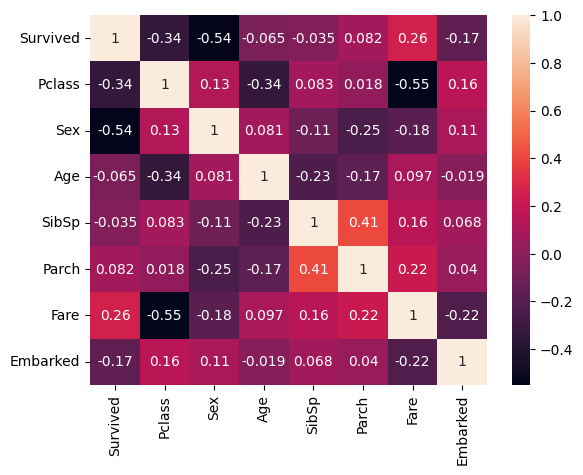

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")

Decision Tree Classifier Accuracy: 0.7821229050279329


In [7]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

Random Forest Classifier Accuracy: 0.8212290502793296


In [8]:
print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

Decision Tree Classifier Accuracy: 0.7821229050279329
Random Forest Classifier Accuracy: 0.8212290502793296


In [9]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree Classifier: \n", cm_dt)

Confusion Matrix for Decision Tree Classifier: 
 [[83 22]
 [17 57]]


In [10]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest Classifier: \n", cm_rf)

Confusion Matrix for Random Forest Classifier: 
 [[92 13]
 [19 55]]


In [11]:
train_accuracy_dt = accuracy_score(y_train, dt_classifier.predict(X_train))
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

train_accuracy_rf = accuracy_score(y_train, rf_classifier.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Classifier - Train Accuracy: {train_accuracy_dt}, Test Accuracy: {test_accuracy_dt}")
print(f"Random Forest Classifier - Train Accuracy: {train_accuracy_rf}, Test Accuracy: {test_accuracy_rf}")

Decision Tree Classifier - Train Accuracy: 0.9789325842696629, Test Accuracy: 0.7821229050279329
Random Forest Classifier - Train Accuracy: 0.9789325842696629, Test Accuracy: 0.8212290502793296


Both Classifiers are overfitting the train data, so max depth should be limited for correction

In [12]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

Random Forest Classifier Accuracy: 0.8100558659217877


In [13]:
train_accuracy_rf = accuracy_score(y_train, rf_classifier.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Classifier - Train Accuracy: {train_accuracy_rf}, Test Accuracy: {test_accuracy_rf}")

Random Forest Classifier - Train Accuracy: 0.8370786516853933, Test Accuracy: 0.8100558659217877
